TOPIC : FAKE NEWS DETECTION

OBJECTIVE : To build a machine learning model capable of detecting fake news by analyzing textual content using Natural Language Processing techniques.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import joblib

In [ ]:
fake=pd.read_csv('Fake.csv', on_bad_lines='skip', engine='python') #skip problematic lines, use python engine for robustness
fake.shape

(5788, 4)

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
fake=fake.fillna('')

In [ ]:
true=pd.read_csv('True.csv', on_bad_lines='skip', engine='python') #skip problematic lines, use python engine for robustness
true.head()
print(f"Number of rows in true dataset: {true.shape[0]}")
print(f"Number of rows in fake dataset: {fake.shape[0]}")
print(f"Total rows before cleaning: {true.shape[0] + fake.shape[0]}")
true.shape

Number of rows in true dataset: 21417
Number of rows in fake dataset: 5788
Total rows before cleaning: 27205


(21417, 4)

In [ ]:
fake['label'] = 1     # 1 = Fake news
true['label'] = 0     # 0 = Real news
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
print("shape of fake_dataset:",fake.shape)


shape of fake_dataset: (5788, 5)


In [ ]:
print("shape of true_dataset:",true.shape)

shape of true_dataset: (21417, 5)


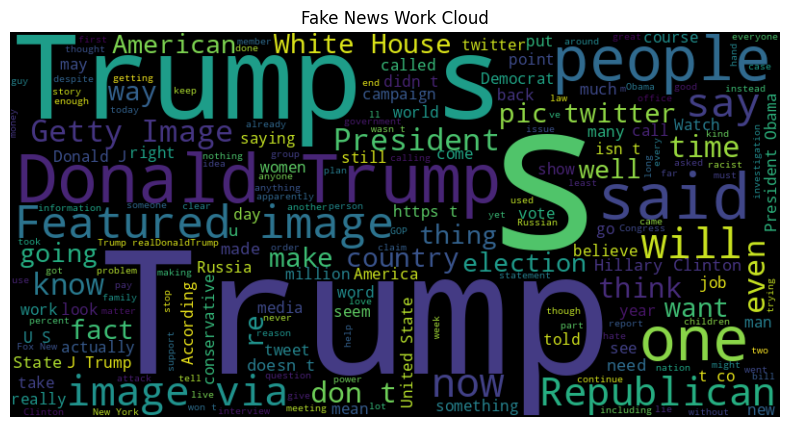

In [ ]:
fake_text = ' '.join(fake.text.astype(str).tolist())
fake_wc = WordCloud(width = 800, height = 400, background_color = 'black').generate(fake_text)
plt.figure(figsize = (10, 5))
plt.imshow(fake_wc, interpolation = 'bilinear')
plt.title('Fake News Work Cloud')
plt.axis('off')
plt.show()

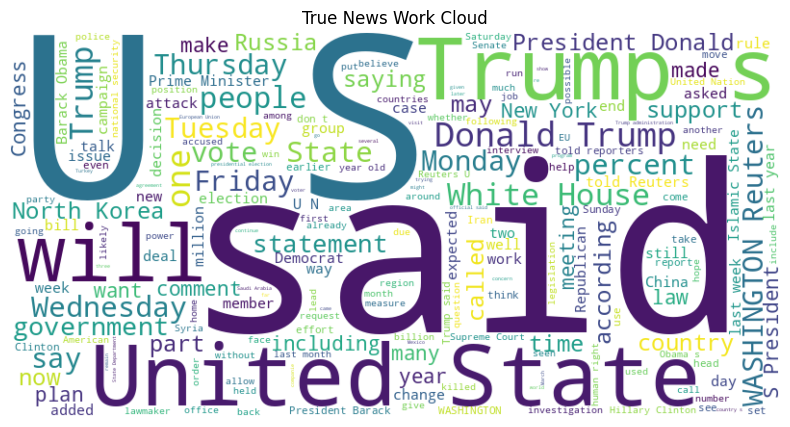

In [ ]:
true_text = ' '.join(true.text.astype(str).tolist())
true_wc = WordCloud(width = 800, height = 400, background_color = 'white').generate(true_text)
plt.figure(figsize = (10, 5))
plt.imshow(true_wc, interpolation = 'bilinear')
plt.title('True News Work Cloud')
plt.axis('off')
plt.show()

In [ ]:


df = pd.concat([fake, true], axis=0).reset_index(drop=True)
print("Total rows after concatenation:", len(df))
df.head()


Total rows after concatenation: 27205


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
df.tail()

,title,text,subject,date,label
27200,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
27201,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
27202,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
27203,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
27204,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,U.S. lawmakers will not tackle healthcare this...,WASHINGTON (Reuters) - Republican lawmakers wi...,politicsNews,"October 25, 2017",0
1,Putin says U.S. hacking scandal not in Russia'...,MOSCOW (Reuters) - The scandal that erupted in...,politicsNews,"October 12, 2016",0
2,"Some Republican pundits, politicians remain de...",NEW YORK (Reuters) - Several Republicans took ...,politicsNews,"May 4, 2016",0
3,House Republicans test Trump on his U.S.-Mexic...,WASHINGTON (Reuters) - Republicans in the Hous...,politicsNews,"November 10, 2016",0
4,Trump Just Got RAZED After His Painfully Stup...,Here s a news flash for Donald Trump: Mexico w...,News,"January 9, 2017",1


In [ ]:
df.shape

(27205, 5)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s)

    s = s.replace('\n',' ')                 # remove newline
    s = re.sub(r'http\S+|www.\S+','', s)    # remove URLs
    s = re.sub(r'[^a-zA-Z ]','', s)         # keep only letters
    s = re.sub(r'\s+', ' ', s).strip()      # remove extra spaces
    return s.lower()


In [ ]:
df['content'] = (
    df['title'].fillna('') + ". " + df['text'].fillna('')
).apply(clean_text)


In [ ]:
df = df[df['content'].str.strip() != ""]
df = df[['content', 'label']]   # keep only useful columns
df = df.reset_index(drop=True)
print("Rows after cleaning:", len(df))


Rows after cleaning: 27205


In [ ]:
SEED = 42

# Check for NaNs in 'label' column before train_test_split
print("NaNs in df['label'] before train_test_split:", df['label'].isnull().sum())

# Drop rows with NaN in 'label' if any exist
if df['label'].isnull().sum() > 0:
    df.dropna(subset=['label'], inplace=True)
    print("Rows with NaN labels dropped. New NaNs in df['label']:", df['label'].isnull().sum())

# Ensure the 'label' column is of integer type after dropping NaNs for stratification
df['label'] = df['label'].astype(int)

train_df, test_df = train_test_split(df, test_size=0.20, stratify=df['label'], random_state=SEED)
X_train_text = train_df['content'].tolist()
y_train = train_df['label'].values
X_test_text = test_df['content'].tolist()
y_test = test_df['label'].values

print("Train / Test sizes:", len(X_train_text), len(X_test_text))

NaNs in df['label'] before train_test_split: 0
Train / Test sizes: 21764 5441


In [ ]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)
print("TF-IDF matrix shape:", X_train.shape)

# Save vectorizer for later use (dashboard/inference)
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

TF-IDF matrix shape: (21764, 3000)


['tfidf_vectorizer.joblib']

In [ ]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Define models

models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, C=0.5),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(C=0.5),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000)
}

results = []


# Train + Evaluate each model

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])


# Create comparison table

df_results = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

df_results = df_results.sort_values(by="Accuracy", ascending=False)

print("\n\n📌 MODEL PERFORMANCE COMPARISON")
print(df_results)



Training Logistic Regression...

Training Naive Bayes...

Training Linear SVM...

Training Passive Aggressive...


📌 MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision    Recall  F1 Score
3   Passive Aggressive  0.997978   0.998262  0.992228  0.995236
2           Linear SVM  0.997611   0.998259  0.990501  0.994365
0  Logistic Regression  0.990811   0.997307  0.959413  0.977993
1          Naive Bayes  0.979232   0.958736  0.943005  0.950805


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.992694       0.990811
1          Naive Bayes        0.978405       0.979232
2           Linear SVM        0.999586       0.997611
3   Passive Aggressive        1.000000       0.997978


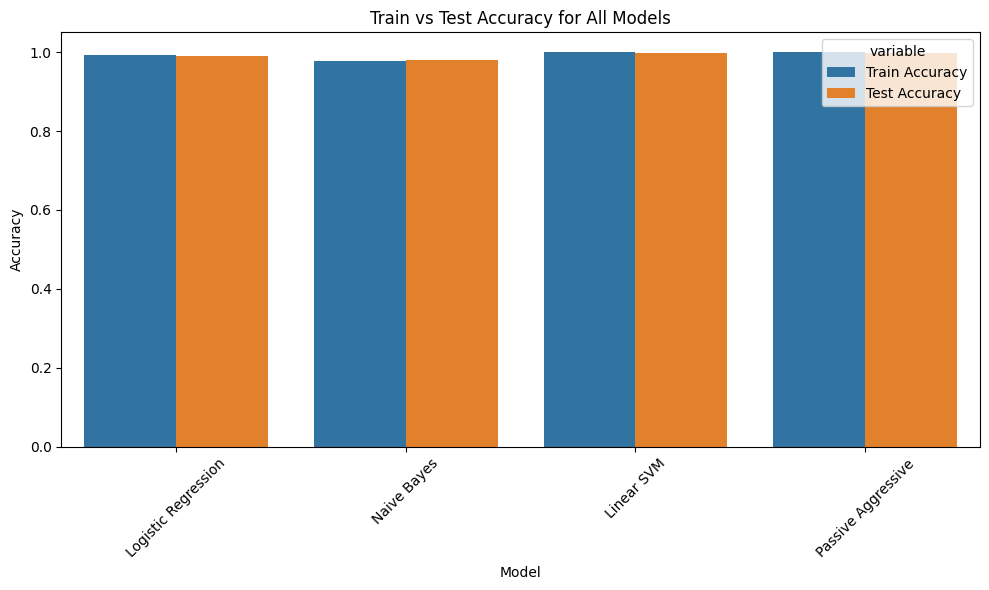

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Compute train & test accuracy for each model

train_test_scores = []

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_test_scores.append([name, train_acc, test_acc])

df_tt = pd.DataFrame(train_test_scores, columns=["Model", "Train Accuracy", "Test Accuracy"])

print(df_tt)


# Plot Train vs Test Accuracy

plt.figure(figsize=(10,6))

df_tt_melted = df_tt.melt(id_vars="Model", value_vars=["Train Accuracy", "Test Accuracy"])

sns.barplot(data=df_tt_melted, x="Model", y="value", hue="variable")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for All Models")
plt.tight_layout()
plt.show()


In [ ]:
# Select model with highest Test Accuracy
best_row = df_tt.sort_values(by="Test Accuracy", ascending=False).iloc[0]
best_model_name = best_row["Model"]

print(" Best Model Selected:", best_model_name)

best_model = models[best_model_name]


 Best Model Selected: Passive Aggressive


In [ ]:
import joblib

joblib.dump(best_model, "best_fake_news_model.joblib")
print("✔ Best model saved as best_fake_news_model.joblib")


✔ Best model saved as best_fake_news_model.joblib


In [ ]:
def predict_news(text):
    # Clean input
    cleaned = clean_text(text)

    # Transform using TF-IDF vectorizer
    x_vec = tfidf.transform([cleaned])

    # Predict
    pred = best_model.predict(x_vec)[0]

    return " REAL News" if pred == 1 else " FAKE News"


In [ ]:
news = """
The government has approved a new vaccine that has shown 98% effectiveness
in preventing viral infections among elderly patients.
"""

print(predict_news(news))


 FAKE News


In [ ]:
news = """
A leaked document claims that the upcoming national election will be postponed indefinitely due to undisclosed security concerns.

"""

print(predict_news(news))


 FAKE News


In [ ]:
news = """ The Election Commission announced that voter turnout in the recent state elections crossed 72%, marking the highest participation in the last decade."""
print(predict_news(news))

 REAL News
